# **PCA and LDA on face recognition**

In [381]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA



Loading Images

In [382]:
folder_path = "faces"
images = []
for filename in os.listdir(folder_path):
    image = np.array(Image.open(os.path.join(folder_path, filename)))
    images.append(image)
    
vect = np.array([image.flatten() for image in images])
scaler = StandardScaler()
vectors = scaler.fit_transform(vect)

In [383]:
rows = ['image%d' %i for i in range(1, 641)]
cols = range(1, 2501)
pd.DataFrame(vectors, index=rows, columns=cols)

,1,2,3,4,5,6,7,8,9,10,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
image1,0.583333,0.987219,1.107160,1.142779,0.954940,0.923502,1.110006,1.164762,1.506634,1.698586,...,0.476327,0.425236,0.383975,0.622836,0.400980,0.359845,-0.119001,0.117092,0.008160,0.153912
image2,0.567155,0.903332,1.054622,0.962286,0.863471,0.923502,1.223416,1.374893,1.584358,1.829708,...,0.888147,0.754527,0.918201,1.051953,0.938385,0.765067,0.351229,0.474107,0.210321,0.640722
image3,0.437733,0.702003,0.914520,0.853989,0.936647,0.808878,1.053301,1.069248,1.118013,1.398878,...,0.287577,0.234593,0.246110,0.416860,0.216248,0.174119,-0.186176,-0.103917,-0.227694,-0.047527
image4,0.858354,1.188548,1.439902,1.305224,1.284230,1.343791,1.620353,1.413099,1.739807,2.091951,...,0.459168,0.373242,0.418441,0.622836,0.484950,0.359845,-0.102207,-0.035914,-0.126614,0.086766
image5,0.923065,1.255657,1.615029,1.449619,1.650108,1.458415,1.941683,1.546818,1.739807,2.035756,...,0.390532,0.303918,0.332276,0.519848,0.216248,0.106582,-0.286940,-0.171920,-0.210847,-0.198606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image636,0.680399,1.490541,1.860207,1.828656,1.650108,1.916913,0.977694,0.286034,0.107599,0.612146,...,-1.016519,-0.978586,-0.925741,-0.904820,-0.875355,-0.889588,-0.841139,-0.834947,-0.783636,-0.685416
image637,-0.807950,-0.774408,-0.731676,-0.734356,-0.856154,-0.891383,-0.893581,-0.898338,-0.902815,-0.867659,...,-0.879246,-0.285341,-0.374281,0.279543,1.139912,1.643047,2.030620,1.953167,1.861300,1.698275
image638,3.058523,2.430075,1.965284,0.980335,0.406124,0.560525,-0.421037,-0.592694,-0.669642,-0.605415,...,-1.050837,-1.047911,-0.960207,-0.956314,-0.925737,-0.940241,-0.908314,-0.885949,-0.884716,-0.752562
image639,-0.775595,-0.740853,-0.679138,-0.752405,-0.801272,-0.853175,-0.874679,-0.841030,-0.863953,-0.811464,...,-1.067996,-1.065242,-1.011906,-0.921984,-0.741004,-0.450598,-0.186176,-0.256923,0.227168,0.372137


Plot the scree plot in order to get the number of components

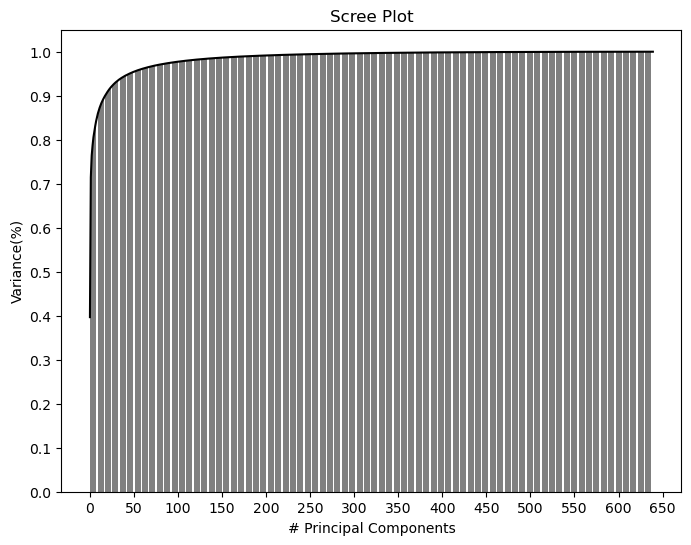

In [384]:
pca = PCA()
pca.fit(vectors)
variance_ratio = pca.explained_variance_ratio_
var_rat = []
var_exp = 0
for i in variance_ratio:
    var_exp += i
    var_rat.append(var_exp)

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(640), var_rat, color='gray')
ax.plot(range(640), var_rat, color='black')
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.set_title('Scree Plot')
ax.set_xlabel('# Principal Components')
ax.set_ylabel('Variance(%)')
plt.show();

According to the above scree plot the number of principle components should be **50**

In [385]:
d = 50
pca = PCA(n_components=d)
pca.fit(vectors)
eigen_values = pca.explained_variance_
eigenvectors = pca.components_
columns = ['eig_vect%d'%i for i in range(1,2501)]
rows = range(1, 51)
eigenvectors_matrix = pd.DataFrame(eigenvectors, columns=columns, index=rows)
eigenvectors_matrix.head()

,eig_vect1,eig_vect2,eig_vect3,eig_vect4,eig_vect5,eig_vect6,eig_vect7,eig_vect8,eig_vect9,eig_vect10,...,eig_vect2491,eig_vect2492,eig_vect2493,eig_vect2494,eig_vect2495,eig_vect2496,eig_vect2497,eig_vect2498,eig_vect2499,eig_vect2500
1,0.000602,0.001791,0.003888,0.005984,0.010746,0.012825,0.014645,0.015763,0.016873,0.015504,...,0.021163,0.020153,0.019455,0.018092,0.015834,0.014622,0.013129,0.010467,0.007987,0.006685
2,0.025088,0.023715,0.022614,0.021915,0.022015,0.021851,0.020772,0.019284,0.018629,0.017823,...,-0.023374,-0.023526,-0.023551,-0.023881,-0.024961,-0.025570,-0.025938,-0.026530,-0.026308,-0.025040
3,0.011809,0.009541,0.009378,0.009484,0.007869,0.005174,0.001957,-0.001600,-0.003968,-0.005044,...,-0.014138,-0.016804,-0.020053,-0.022775,-0.024413,-0.025328,-0.025657,-0.026445,-0.024992,-0.022611
4,0.024368,0.023497,0.018033,0.015300,0.012396,0.007502,0.001188,-0.004560,-0.004940,-0.006615,...,0.015238,0.019701,0.019768,0.022189,0.026252,0.028476,0.030127,0.032335,0.032763,0.033320
5,0.045147,0.046822,0.051590,0.053639,0.042540,0.042321,0.045567,0.050748,0.043116,0.045785,...,0.007200,0.002352,0.006981,0.010108,0.011759,0.007953,0.010448,0.010345,0.013183,0.018206


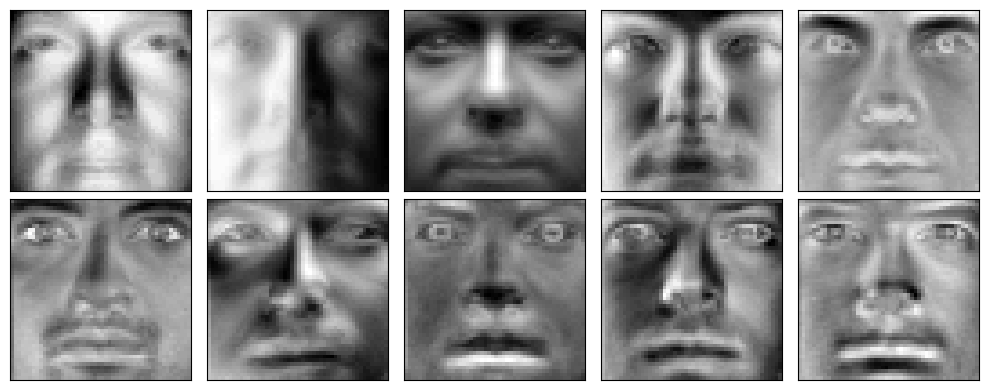

In [386]:
eigenfaces = []
for ev in eigenvectors:
    ef = np.reshape(ev, (50, 50))
    eigenfaces.append(ef)

# normalize the eigenfaces
eigenfaces = (eigenfaces - np.min(eigenfaces)) / (np.max(eigenfaces) - np.min(eigenfaces))
eigenfaces = (255 * eigenfaces).astype(np.uint8)

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(eigenfaces[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
plt.tight_layout()
plt.show()

In [387]:
project_img = pca.transform(vectors)
recon_imset = pca.inverse_transform(project_img)
mse = mean_squared_error(vectors, recon_imset)
print('PCA Error for d=50:\t', mse)

PCA Error for d=50:	 0.04618122078040548


Classification with the NearestNeighbors on eigenspace

The indices data frame reports the nearest index of training images for each test image based on euclidean metric.

In [388]:
arrays = [np.ones(64)*i for i in range(1, 11)]
y = np.concatenate(arrays)

X_train, X_test, y_train, y_test = train_test_split(project_img, y, test_size=0.2, random_state=42)
nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn.fit(X_train)
indices = nn.kneighbors(X_test, return_distance=False)
pd.DataFrame(indices, columns=['1'], index=range(1, 129))

,1
1,257
2,442
3,417
4,9
5,125
...,...
124,40
125,157
126,277
127,55


Part B

LDA Algorithm

In [389]:
n = vectors.shape[0]
c = 10
d = n - c
pca = PCA(n_components=d)
pca.fit(vectors)
project_img = pca.transform(vectors)
lda = LDA(n_components=9, solver='eigen')
X_lda = lda.fit_transform(project_img, y)
X_lda.shape

(640, 9)

Loading the image subsets

In [397]:
set1 = []
set2 = []
set3 = []
set4 = []
set5 = []
for i in range(1, 11):
  if i in range(1, 10):
    for j in range(1, 8):
        filename = f'person0{str(i)}_{str(j).zfill(2)}.png'
        filepath = np.array(Image.open(os.path.join(folder_path, filename)))
        set1.append(filepath)

    for j in range(8, 20):
        filename = f'person0{str(i)}_{str(j).zfill(2)}.png'
        filepath = np.array(Image.open(os.path.join(folder_path, filename)))
        set2.append(filepath)

    for j in range(20, 32):
        filename = f'person0{str(i)}_{str(j).zfill(2)}.png'
        filepath = np.array(Image.open(os.path.join(folder_path, filename)))
        set3.append(filepath)

    for j in range(32, 46):
        filename = f'person0{str(i)}_{str(j).zfill(2)}.png'
        filepath = np.array(Image.open(os.path.join(folder_path, filename)))
        set4.append(filepath)

    for j in range(46, 65):
        filename = f'person0{str(i)}_{str(j).zfill(2)}.png'
        filepath = np.array(Image.open(os.path.join(folder_path, filename)))
        set5.append(filepath)


  else:
    for j in range(1, 8):
      filename = f'person{str(i)}_{str(j).zfill(2)}.png'
      filepath = np.array(Image.open(os.path.join(folder_path, filename)))
      set1.append(filepath)

    for j in range(8, 20):
      filename = f'person{str(i)}_{str(j).zfill(2)}.png'
      filepath = np.array(Image.open(os.path.join(folder_path, filename)))
      set2.append(filepath)

    for j in range(20, 32):
      filename = f'person{str(i)}_{str(j).zfill(2)}.png'
      filepath = np.array(Image.open(os.path.join(folder_path, filename)))
      set3.append(filepath)

    for j in range(32, 46):
      filename = f'person{str(i)}_{str(j).zfill(2)}.png'
      filepath = np.array(Image.open(os.path.join(folder_path, filename)))
      set4.append(filepath)

    for j in range(46, 65):
      filename = f'person{str(i)}_{str(j).zfill(2)}.png'
      filepath = np.array(Image.open(os.path.join(folder_path, filename)))
      set5.append(filepath)

vect = np.array([image.flatten() for image in set1])
scaler = StandardScaler()
image_set1 = scaler.fit_transform(vect)

vect = np.array([image.flatten() for image in set2])
scaler = StandardScaler()
image_set2 = scaler.fit_transform(vect)

vect = np.array([image.flatten() for image in set3])
scaler = StandardScaler()
image_set3 = scaler.fit_transform(vect)

vect = np.array([image.flatten() for image in set4])
scaler = StandardScaler()
image_set4 = scaler.fit_transform(vect)

vect = np.array([image.flatten() for image in set5])
scaler = StandardScaler()
image_set5 = scaler.fit_transform(vect)



In [398]:
rows = ['image set%d'%i for i in range(1, 6)]
columns = ['PCA 9', 'PCA 30']
errors = pd.DataFrame(index=rows, columns=columns)

PCA for d = 9

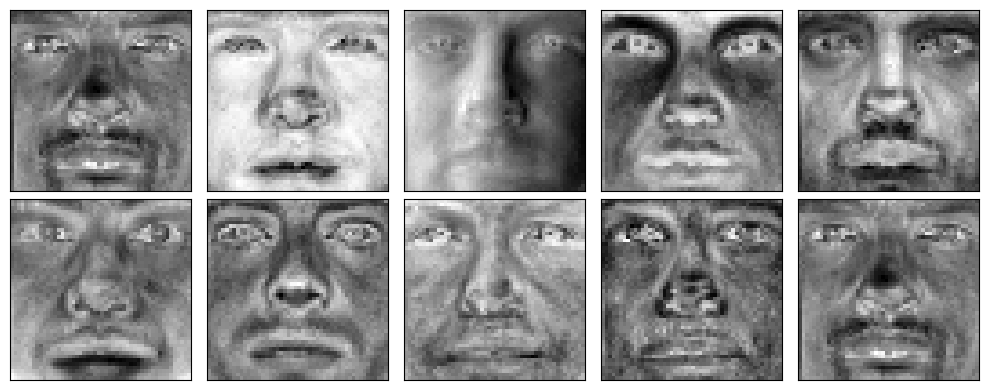

In [399]:
d = 9
pca = PCA(n_components=d)
pca.fit(image_set1)
project_img_train = pca.transform(image_set1)
eigen_values = pca.explained_variance_
eigenvectors = pca.components_

eigenfaces = []
for ev in eigenvectors:
    ef = np.reshape(ev, (50, 50))
    eigenfaces.append(ef)

# normalize the eigenfaces
eigenfaces = (eigenfaces - np.min(eigenfaces)) / (np.max(eigenfaces) - np.min(eigenfaces))
eigenfaces = (255 * eigenfaces).astype(np.uint8)

# display the eigenfaces
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(eigenfaces[i-1], cmap='gray')
    axi.set(xticks=[], yticks=[])
plt.tight_layout()
plt.show()

In [400]:
image_sets = [image_set1, image_set2, image_set3, image_set4, image_set5]

def error_eval(x):
    error_pca9 = []
    for i in range(5):
      pro_imset = pca.transform(x[i])
      recon_imset = pca.inverse_transform(pro_imset)
      mse = mean_squared_error(x[i], recon_imset)
      error_pca9.append(mse)

    return error_pca9

errors['PCA 9'] = error_eval(image_sets)

PCA for d = 30

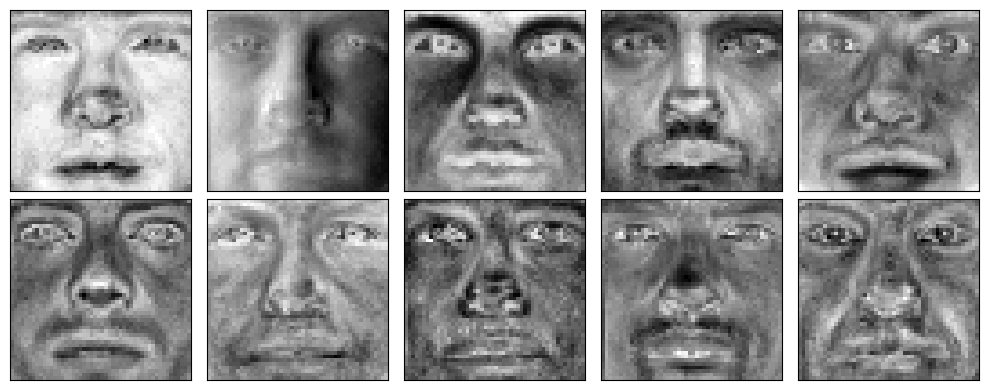

In [403]:
d = 30
pca = PCA(n_components=d)
pca.fit(image_set1)
eigen_values = pca.explained_variance_
eigenvectors = pca.components_

eigenfaces = []
for ev in eigenvectors:
    ef = np.reshape(ev, (50, 50))
    eigenfaces.append(ef)

# normalize the eigenfaces
eigenfaces = (eigenfaces - np.min(eigenfaces)) / (np.max(eigenfaces) - np.min(eigenfaces))
eigenfaces = (255 * eigenfaces).astype(np.uint8)

# display the eigenfaces
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(eigenfaces[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
plt.tight_layout()
plt.show()

In [404]:
image_sets = [image_set1, image_set2, image_set3, image_set4, image_set5]

def error_eval(sets):
    error_pca30 = []
    for i in range(5):
      pro_imset = pca.transform(sets[i])
      recon_imset = pca.inverse_transform(pro_imset)
      mse = mean_squared_error(sets[i], recon_imset)
      error_pca30.append(mse)
      
    return error_pca30

errors['PCA 30'] = error_eval(image_sets)

In [405]:
errors

,PCA 9,PCA 30
image set1,0.092196,0.012979
image set2,0.224548,0.125735
image set3,0.279902,0.183419
image set4,0.334847,0.261829
image set5,0.425520,0.360447


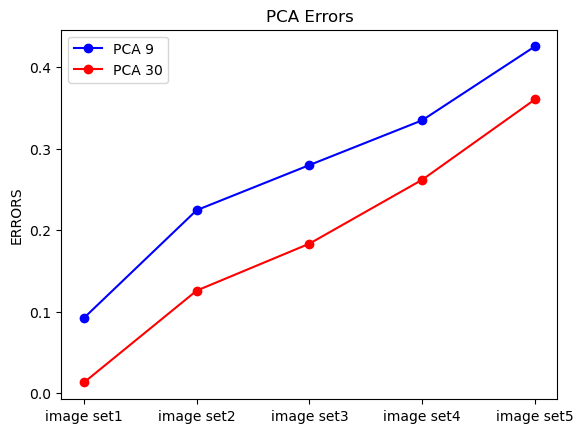

In [406]:
plt.plot(errors['PCA 9'], 'bo-',
         errors['PCA 30'], 'ro-')
plt.title('PCA Errors')
plt.ylabel('ERRORS')
plt.legend(['PCA 9', 'PCA 30'])
plt.show()

As it is crystal clear, the above plot illustrates that PCA with d = 30 performs better than PCA with d = 9 

and has lower error rate on all provided image subsets. 

Also, since the algorithms were firstly applied to subset1 it has the lowest error in both PCAs.